<a href="https://colab.research.google.com/github/chris-dewitt/chris-dewitt/blob/main/gpvfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Data

In [ ]:
import pandas as pd
import numpy as np

fed = pd.read_csv("https://raw.githubusercontent.com/vtasca/fed-statement-scraping/refs/heads/master/communications.csv")
fed = fed[fed.Type == 'Statement'].reset_index()

Clean and Transform Data

In [ ]:
import datetime
dates = []
for date in fed.Date:
  year = int(str(date)[:4])
  m = int(str(date)[5:7])
  d = int(str(date)[8:])
  dates.append(datetime.datetime(year, m, d))

In [ ]:
fed['Date'] = dates

In [ ]:
fed1 = fed.drop(labels=['index', 'Release Date', 'Type'], axis =1)
fed1.head()

,Date,Text
0,2025-03-19,Recent indicators suggest that economic activi...
1,2025-01-29,Recent indicators suggest that economic activi...
2,2024-12-18,Recent indicators suggest that economic activi...
3,2024-11-07,Recent indicators suggest that economic activi...
4,2024-09-18,Recent indicators suggest that economic activi...


In [ ]:
def delete_after_phrase(text, phrase):
    index = text.find(phrase)
    if index != -1:
        return text[:index]
    return text

n_txt=[]
phrase = "\n\nFor media inquiries,"
for txt in fed1.Text:
  n_txt.append(delete_after_phrase(txt, phrase))
fed1['Text'] = n_txt

In [ ]:
n_txt=[]
phrase = "\n\nVoting for the monetary policy action"
for txt in fed1.Text:
  n_txt.append(delete_after_phrase(txt, phrase))
fed1['Text'] = n_txt

FRED Data Integration

In [ ]:
assets = pd.read_csv("WALCL.csv")
assets.head()

,observation_date,WALCL
0,2002-12-18,719542
1,2002-12-25,732059
2,2003-01-01,730994
3,2003-01-08,723762
4,2003-01-15,720074


In [ ]:
assets['observation_date'] = pd.to_datetime(assets['observation_date'])

In [ ]:
fed1['assetDate'] = [min(assets.observation_date, key = lambda date: abs(date - d)) for d in fed1.Date]

In [ ]:
fed_df = pd.merge(fed1, assets, left_on='assetDate', right_on='observation_date', how='left').drop(labels = ['observation_date', 'assetDate'], axis = 1)
fed_df.head()

,Date,Text,WALCL
0,2025-03-19,Recent indicators suggest that economic activi...,6755982
1,2025-01-29,Recent indicators suggest that economic activi...,6818186
2,2024-12-18,Recent indicators suggest that economic activi...,6889332
3,2024-11-07,Recent indicators suggest that economic activi...,6994299
4,2024-09-18,Recent indicators suggest that economic activi...,7109137


In [ ]:
ffr = pd.read_csv('FEDFUNDS.csv')
ffr['observation_date'] = pd.to_datetime(ffr['observation_date'])
ffr.tail()

,observation_date,FEDFUNDS
843,2024-10-01,4.83
844,2024-11-01,4.64
845,2024-12-01,4.48
846,2025-01-01,4.33
847,2025-02-01,4.33


In [ ]:
fed_df['ffrDate'] = [min(ffr.observation_date, key = lambda date: abs(date - d)) for d in fed_df.Date]

In [ ]:
fed_df2 = pd.merge(fed_df, ffr, left_on='ffrDate', right_on='observation_date', how='left').drop(labels = ['observation_date', 'ffrDate'], axis = 1)
fed_df2.head()

,Date,Text,WALCL,FEDFUNDS
0,2025-03-19,Recent indicators suggest that economic activi...,6755982,4.33
1,2025-01-29,Recent indicators suggest that economic activi...,6818186,4.33
2,2024-12-18,Recent indicators suggest that economic activi...,6889332,4.33
3,2024-11-07,Recent indicators suggest that economic activi...,6994299,4.64
4,2024-09-18,Recent indicators suggest that economic activi...,7109137,4.83


In [ ]:
uer = pd.read_csv('UNRATE.csv')
uer['observation_date'] = pd.to_datetime(uer['observation_date'])
uer.tail()

,observation_date,UNRATE
297,2024-10-01,4.1
298,2024-11-01,4.2
299,2024-12-01,4.1
300,2025-01-01,4.0
301,2025-02-01,4.1


In [ ]:
fed_df2['uerDate'] = [min(uer.observation_date, key = lambda date: abs(date - d)) for d in fed_df2.Date]

In [ ]:
fed_df3 = pd.merge(fed_df2, uer, left_on='uerDate', right_on='observation_date', how='left').drop(labels = ['observation_date', 'uerDate'], axis = 1)
fed_df3.head()

,Date,Text,WALCL,FEDFUNDS,UNRATE
0,2025-03-19,Recent indicators suggest that economic activi...,6755982,4.33,4.1
1,2025-01-29,Recent indicators suggest that economic activi...,6818186,4.33,4.1
2,2024-12-18,Recent indicators suggest that economic activi...,6889332,4.33,4.0
3,2024-11-07,Recent indicators suggest that economic activi...,6994299,4.64,4.2
4,2024-09-18,Recent indicators suggest that economic activi...,7109137,4.83,4.1


In [ ]:
pay = pd.read_csv('PAYEMS_CH1.csv')
pay['observation_date'] = pd.to_datetime(pay['observation_date'])
pay.tail()

,observation_date,PAYEMS_CH1
292,2024-10-01,1838
293,2024-11-01,1958
294,2024-12-01,2012
295,2025-01-01,2018
296,2025-02-01,1947


In [ ]:
fed_df3['payDate'] = [min(pay.observation_date, key = lambda date: abs(date - d)) for d in fed_df3.Date]

In [ ]:
fed_df_pay = pd.merge(fed_df3, pay, left_on='payDate', right_on='observation_date', how='left').drop(labels = ['observation_date', 'payDate'], axis = 1)
fed_df_pay.head()

,Date,Text,WALCL,FEDFUNDS,UNRATE,PAYEMS_CH1
0,2025-03-19,Recent indicators suggest that economic activi...,6755982,4.33,4.1,1947
1,2025-01-29,Recent indicators suggest that economic activi...,6818186,4.33,4.1,1947
2,2024-12-18,Recent indicators suggest that economic activi...,6889332,4.33,4.0,2018
3,2024-11-07,Recent indicators suggest that economic activi...,6994299,4.64,4.2,1958
4,2024-09-18,Recent indicators suggest that economic activi...,7109137,4.83,4.1,1838


In [ ]:
pce = pd.read_csv('PCE_PC1.csv')
pce['observation_date'] = pd.to_datetime(pce['observation_date'])
pce.tail()

,observation_date,PCE_PC1
297,2024-10-01,5.52558
298,2024-11-01,5.66080
299,2024-12-01,5.79682
300,2025-01-01,5.40177
301,2025-02-01,5.28829


In [ ]:
fed_df_pay['pceDate'] = [min(pay.observation_date, key = lambda date: abs(date - d)) for d in fed_df_pay.Date]

In [ ]:
fed_df_pce = pd.merge(fed_df_pay, pce, left_on='pceDate', right_on='observation_date', how='left').drop(labels = ['observation_date', 'pceDate'], axis = 1)
fed_df_pce.head()

,Date,Text,WALCL,FEDFUNDS,UNRATE,PAYEMS_CH1,PCE_PC1
0,2025-03-19,Recent indicators suggest that economic activi...,6755982,4.33,4.1,1947,5.28829
1,2025-01-29,Recent indicators suggest that economic activi...,6818186,4.33,4.1,1947,5.28829
2,2024-12-18,Recent indicators suggest that economic activi...,6889332,4.33,4.0,2018,5.40177
3,2024-11-07,Recent indicators suggest that economic activi...,6994299,4.64,4.2,1958,5.66080
4,2024-09-18,Recent indicators suggest that economic activi...,7109137,4.83,4.1,1838,5.52558


In [ ]:
gdp = pd.read_csv('GDPC1_PC1.csv')
gdp['observation_date'] = pd.to_datetime(gdp['observation_date'])
gdp.head()

,observation_date,GDPC1_PC1
0,2000-01-01,4.22474
1,2000-04-01,5.24446
2,2000-07-01,3.97317
3,2000-10-01,2.90559
4,2001-01-01,2.19751


In [ ]:
fed_df_pce['gdpDate'] = [min(gdp.observation_date, key = lambda date: abs(date - d)) for d in fed_df_pce.Date]

In [ ]:
fed_df_gdp = pd.merge(fed_df_pce, gdp, left_on='gdpDate', right_on='observation_date', how='left').drop(labels = ['observation_date', 'gdpDate'], axis = 1)
fed_df_gdp.head()

,Date,Text,WALCL,FEDFUNDS,UNRATE,PAYEMS_CH1,PCE_PC1,GDPC1_PC1
0,2025-03-19,Recent indicators suggest that economic activi...,6755982,4.33,4.1,1947,5.28829,2.53368
1,2025-01-29,Recent indicators suggest that economic activi...,6818186,4.33,4.1,1947,5.28829,2.53368
2,2024-12-18,Recent indicators suggest that economic activi...,6889332,4.33,4.0,2018,5.40177,2.53368
3,2024-11-07,Recent indicators suggest that economic activi...,6994299,4.64,4.2,1958,5.66080,2.53368
4,2024-09-18,Recent indicators suggest that economic activi...,7109137,4.83,4.1,1838,5.52558,2.53368


In [ ]:
cpi = pd.read_csv('CORESTICKM679SFRBATL.csv')
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])
cpi.tail()

,observation_date,CORESTICKM679SFRBATL
297,2024-10-01,3.643250
298,2024-11-01,3.358040
299,2024-12-01,2.978223
300,2025-01-01,3.437027
301,2025-02-01,3.537460


In [ ]:
fed_df_gdp['cpiDate'] = [min(cpi.observation_date, key = lambda date: abs(date - d)) for d in fed_df_gdp.Date]

In [ ]:
fed_df4 = pd.merge(fed_df_gdp, cpi, left_on='cpiDate', right_on='observation_date', how='left').drop(labels = ['observation_date', 'cpiDate'], axis = 1).reset_index()
fed_df4.head()

,index,Date,Text,WALCL,FEDFUNDS,UNRATE,PAYEMS_CH1,PCE_PC1,GDPC1_PC1,CORESTICKM679SFRBATL
0,0,2025-03-19,Recent indicators suggest that economic activi...,6755982,4.33,4.1,1947,5.28829,2.53368,3.537460
1,1,2025-01-29,Recent indicators suggest that economic activi...,6818186,4.33,4.1,1947,5.28829,2.53368,3.537460
2,2,2024-12-18,Recent indicators suggest that economic activi...,6889332,4.33,4.0,2018,5.40177,2.53368,3.437027
3,3,2024-11-07,Recent indicators suggest that economic activi...,6994299,4.64,4.2,1958,5.66080,2.53368,3.358040
4,4,2024-09-18,Recent indicators suggest that economic activi...,7109137,4.83,4.1,1838,5.52558,2.53368,3.643250


Sentiment Classifier

In [ ]:
from transformers import pipeline

sentiment_classifier = pipeline("text-classification", model="Moritz-Pfeifer/CentralBankRoBERTa-sentiment-classifier")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# Not Needed For Analysis
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Moritz-Pfeifer/CentralBankRoBERTa-sentiment-classifier")

import re

def clean_text(text):
    text = re.sub(r"[^\w\s.,!?]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text


def split_text_into_chunks(text, max_tokens=512, overlap=50):
    text=clean_text(text)
    tokens = tokenizer.tokenize(text)
    if not tokens:
        return []  # Prevent empty chunk errors

    chunks = []
    for i in range(0, len(tokens), max_tokens - overlap):
        chunk = tokens[i : i + max_tokens]  # Ensure it doesn’t exceed the model’s limit
        chunk_text = tokenizer.convert_tokens_to_string(chunk)

        if chunk_text.strip():  # Prevent empty strings
            chunks.append(chunk_text)

    return chunks


In [ ]:
agent_classifier = pipeline("text-classification", model="Moritz-Pfeifer/CentralBankRoBERTa-agent-classifier")

config.json:   0%|          | 0.00/928 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
classes = []

for i, text in enumerate(fed_df4.Text):
    chnks = split_text_into_chunks(text)
    if len(chnks) > 1:
      txt1 = chnks.pop(0)
      classes.append(agent_classifier(txt1, truncation=True, max_length=512))
    else:
      classes.append(agent_classifier(text, truncation=True, max_length=512))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
scrs = []

for i, text in enumerate(fed_df4.Text):
    chnks = split_text_into_chunks(text)
    if len(chnks) > 1:
      txt1 = chnks.pop(0)
      scrs.append(sentiment_classifier(txt1, truncation=True, max_length=512))
    else:
      scrs.append(sentiment_classifier(text, truncation=True, max_length=512))

In [ ]:
classes[0]

[{'label': 'Central Bank', 'score': 0.49295490980148315}]

In [ ]:
fed_df4['Sentiment'] = [scr[0]['label'] for scr in scrs]
fed_df4['Confidence'] = [scr[0]['score'] for scr in scrs]
fed_df4['Class'] = [cl[0]['label'] for cl in classes]
fed_df4['classConfidence'] = [cl[0]['score'] for cl in classes]

SP500 ETF Load

In [ ]:
import yfinance as yf
min_date = min(fed_df4['Date'])
spy = yf.download('^RUT', start=min_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
spy

Price,Close,High,Low,Open,Volume
Ticker,^RUT,^RUT,^RUT,^RUT,^RUT
Date,,,,,
2000-02-02,509.890015,511.459991,503.750000,503.750000,1038600000
2000-02-03,521.630005,521.630005,509.890015,509.890015,1146500000
2000-02-04,525.520020,527.289978,521.630005,521.630005,1045100000
2000-02-07,532.390015,532.400024,525.520020,525.520020,918100000
2000-02-08,537.489990,539.150024,532.390015,532.390015,1047700000
...,...,...,...,...,...
2025-04-01,2012.239990,2027.000000,1985.670044,2007.589966,4434500000
2025-04-02,2045.359985,2048.149902,1986.329956,1998.329956,4243830000


In [ ]:
spy = spy.sort_index()

# Convert to business/trading day index
trading_dates = spy.index

op_c = []
cl_3 = []

for date in fed_df4['Date']:
    # Find the trading date on or after the meeting date
    open_date = trading_dates[trading_dates >= date].min()
    open_price = spy.loc[open_date, 'Open'] if open_date in spy.index else np.nan
    op_c.append(open_price)

    # Find the date 3 trading days after
    try:
        idx = trading_dates.get_loc(open_date)
        close_date = trading_dates[idx + 3]  # 3 trading days later
        close_price = spy.loc[close_date, 'Close']
    except (KeyError, IndexError):
        close_price = np.nan

    cl_3.append(close_price)

In [ ]:
fed_df4['Open'] = [x.values for x in op_c]
fed_df4['3_day_close'] =[x.values for x in cl_3]
fed1 = fed_df4[fed_df4['3_day_close'] != 0]
fed_df4 = fed1[fed1['Open'] != 0]
print(len(fed_df4))

214


In [ ]:
fed_df4['3_day_close'] = [x[0] for x in fed_df4['3_day_close']]
fed_df4['Open'] = [x[0] for x in fed_df4['Open']]

In [ ]:
fed_df4['3d_return'] = [(tdc - o) / o for o, tdc in zip(fed_df4['Open'], fed_df4['3_day_close'])]

In [ ]:
fed_df4['result'] = (fed_df4['3d_return'] >= 0).astype(int)

Volitility

In [ ]:
min_date = min(fed_df4['Date'])
vix = yf.download('^VIX', start=min_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
vix = vix.sort_index()
vix_dates = vix.index
vix_month_change = []

for date in fed_df4['Date']:
    # Get the first VIX trading date on or after the meeting date
    current_date = vix_dates[vix_dates >= date].min()

    try:
        # Index of the current trading date
        idx_now = vix_dates.get_loc(current_date)
        # Index 21 trading days back
        idx_past = idx_now - 21
        if idx_past < 0:
            vix_month_change.append(np.nan)
            continue

        open_now = vix.loc[vix_dates[idx_now], 'Open'].item()
        open_past = vix.loc[vix_dates[idx_past], 'Open'].item()

        pct_change = (open_now - open_past) / open_past * 100
        vix_month_change.append(pct_change)
    except:
        vix_month_change.append(np.nan)


In [ ]:
 fed_df4['vixch'] = vix_month_change
 fed_df4['vixch'] = fed_df4.vixch.fillna(0)

Final Transform

In [ ]:
fed_df4['Sentiment_Bool']=[1 if s[0] == 'positive' and s[1] > 0.65  else 0 for s in fed_df4[['Sentiment', 'Confidence']].values]

In [ ]:
fed_df4['Households_Bool']=[1 if s[0] == 'Households' and s[1] > 0.55  else 0 for s in fed_df4[['Class', 'classConfidence']].values]

In [ ]:
# Change Confusing Column Names
fed_int = fed_df4.rename(columns={'CORESTICKM679SFRBATL': 'cpi', 'WALCL': 'assets', 'PAYEMS_CH1': 'payroll_unemployment', "PCE_PC1": "pce", 'GDPC1_PC1': 'gdp' }).drop(labels=['index'], axis=1)

In [ ]:
# fed_int['rolling_cpi_mean'] = fed_int['cpi'].rolling(-3).mean()
# fed_int['rolling_cpi_mean'] = fed_int['rolling_cpi_mean'].bfill()
# fed_int['rolling_gdp_mean'] = fed_int['gdp'].rolling(3).mean()
# fed_int['rolling_gdp_mean'] = fed_int['rolling_gdp_mean'].bfill()
# fed_int['rolling_pce_mean'] = fed_int['pce'].rolling(3).mean()
# fed_int['rolling_pce_mean'] = fed_int['rolling_pce_mean'].bfill()
fed_int['asset_3_ch'] = fed_int['assets'] - fed_int['assets'].shift(-3)
fed_int['asset_3_ch'] = fed_int['asset_3_ch'].ffill()
fed_int['priorFedFunds'] = fed_int['FEDFUNDS'].shift(-1)
fed_int['priorFedFunds'] = fed_int['priorFedFunds'].fillna(0)
fed_int['priorSentiment'] = fed_int['Sentiment_Bool'].shift(-1)
fed_int['priorSentiment'] = fed_int['priorSentiment'].fillna(0)
fed_int['2priorSentiment'] = fed_int['Sentiment_Bool'].shift(-2)
fed_int['2priorSentiment'] = fed_int['2priorSentiment'].fillna(0)
# fed_int['priorResult'] = fed_int['result'].shift(-1)
# fed_int['priorResult'] = fed_int['priorResult'].fillna(0)
# fed_int['2priorResult'] = fed_int['result'].shift(-2)
# fed_int['2priorResult'] = fed_int['2priorResult'].fillna(0)

In [ ]:
# Remove Outlier
fed_final = fed_int[fed_int['3d_return'] < np.max(fed_int['3d_return'])]

In [ ]:
from sklearn.preprocessing import StandardScaler

feat_cols = fed_final.columns.difference(['Date', 'Text', 'Sentiment', 'Confidence', 'Class', 'classConfidence', 'Open', '3_day_close', '3d_return', 'result', 'Households_Bool'])
X_featcols = fed_final[feat_cols]
X_featcols.iloc[0]
X_bool = X_featcols[['2priorSentiment', 'priorSentiment', 'Sentiment_Bool']]
X_cont = X_featcols.drop(['2priorSentiment', 'priorSentiment', 'Sentiment_Bool'], axis=1)

scaler = StandardScaler()
X_econ = scaler.fit_transform(X_cont)
X_sent = np.array(X_bool)

X = np.concatenate([X_econ, np.array(X_sent)], axis=1)

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_econ)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.40303394 0.2037475  0.12761966 0.09813275]
Total variance retained: 0.8325338564561898


In [ ]:
X = np.concatenate([X_pca, np.array(X_sent)], axis=1)
feature_pca = feat_cols.difference(['2priorSentiment', 'priorSentiment', 'Sentiment_Bool'])

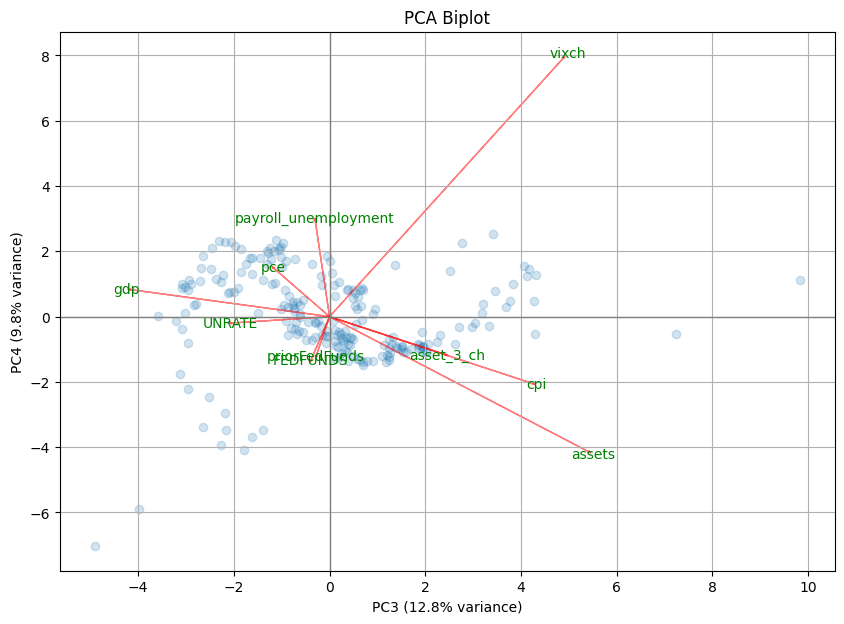

In [ ]:
import matplotlib.pyplot as plt
def biplot(X_pca, pca, feature_names):
    plt.figure(figsize=(10, 7))

    # Plot the PCA-transformed samples
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)

    # Plot arrows for each feature
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0,
                  pca.components_[2, i] * 10,
                  pca.components_[3, i] * 10,
                  color='r', alpha=0.5, head_width=0.05)
        plt.text(pca.components_[2, i] * 10.2,
                 pca.components_[3, i] * 10.2,
                 feature, color='g', ha='center', va='center')

    plt.xlabel(f"PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)")
    plt.ylabel(f"PC4 ({pca.explained_variance_ratio_[3]:.1%} variance)")
    plt.title("PCA Biplot")
    plt.grid(True)
    plt.axhline(0, color='gray', lw=1)
    plt.axvline(0, color='gray', lw=1)
    plt.show()

# Example usage:
biplot(X_pca, pca, feature_pca)

In [ ]:
from sklearn.model_selection import train_test_split


y_class = fed_final['result']  # assuming returns_3d is your target series

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


mod2 = RandomForestClassifier()
mod2.fit(X_train, y_train)
y_pred = mod2.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.67      0.87      0.75        23

    accuracy                           0.70        43
   macro avg       0.72      0.68      0.68        43
weighted avg       0.71      0.70      0.69        43

Accuracy:  0.6976744186046512


In [ ]:
import pandas as pd

importances = mod2.feature_importances_
feature_names = ['PCA1','PCA2','PCA3','PCA4','2priorSentiment', 'priorSentiment', 'Sentiment_Bool']

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))
X[0]

           Feature  Importance
2             PCA3    0.245726
1             PCA2    0.224672
3             PCA4    0.224651
0             PCA1    0.211607
5   priorSentiment    0.034819
4  2priorSentiment    0.033341
6   Sentiment_Bool    0.025184


array([-1.91424811,  0.86503446,  1.24247937,  0.01480941,  0.        ,
        0.        ,  0.        ])

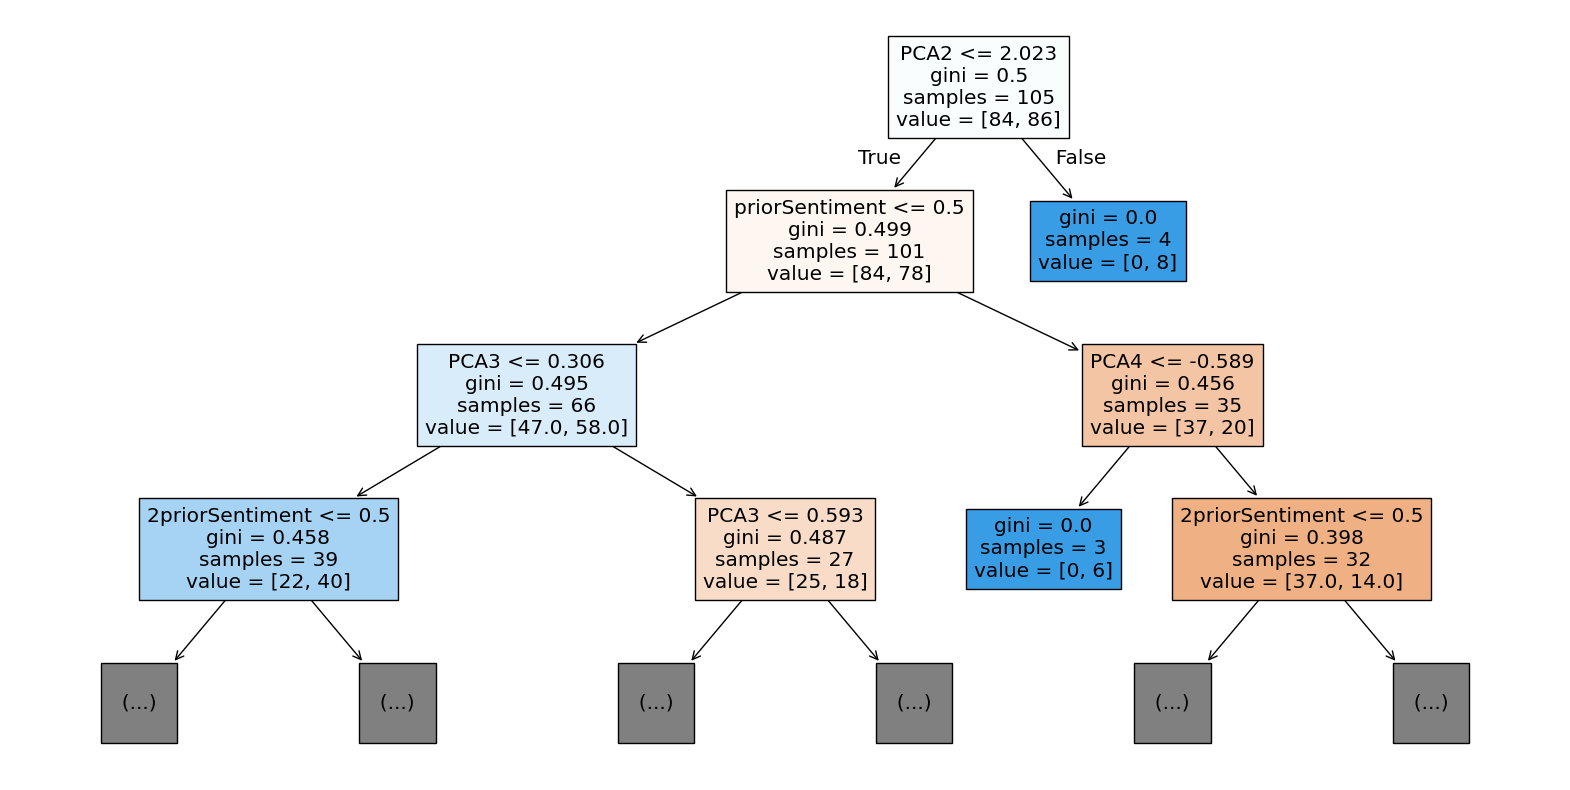

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(mod2.estimators_[0], feature_names=feature_names, filled=True, max_depth=3)
plt.show()